In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
ls

Untitled.ipynb  missouri.xlsx   states_all.csv*


In [28]:
df = pd.read_csv('states_all.csv')

In [29]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [30]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [31]:
df['Spent_per_Student'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']

In [32]:
#df.set_index('YEAR', inplace = True)
df1 = df[df['STATE'] == 'MISSOURI'][['YEAR','Spent_per_Student']]
df1

,YEAR,Spent_per_Student
25,1992,5.342348
76,1993,5.347952
127,1994,5.700799
178,1995,6.102359
229,1996,6.421515
280,1997,6.667187
331,1998,6.995279
382,1999,7.412998
433,2000,7.989158
484,2001,8.449656


In [20]:
plt.style.use('ggplot')
plt.xkcd()

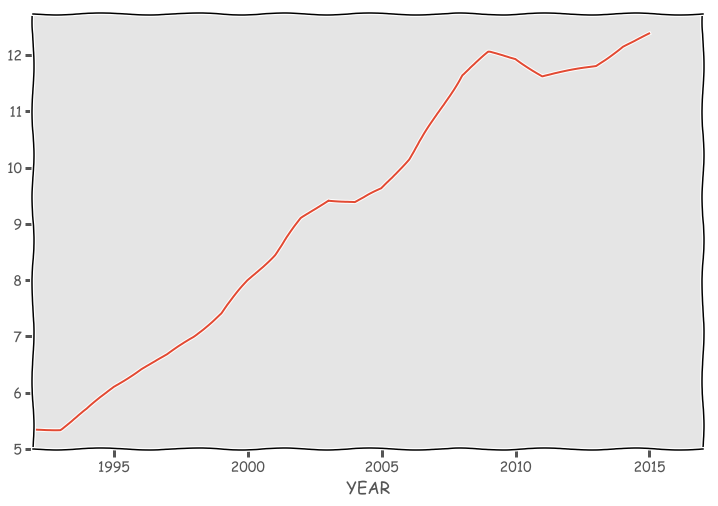

In [21]:
df1.plot(kind = 'line', figsize = (12, 8))
plt.show()

In [23]:
writer = pd.ExcelWriter('missouri.xlsx', engine = 'xlsxwriter')
df1.to_excel(writer, sheet_name = 'Missouri')
workbook = writer.book
worksheet = writer.sheets['Missouri']
workbook.close()

In [33]:
writer = pd.ExcelWriter('missouri.xlsx', engine = 'xlsxwriter')
df1.to_excel(writer, sheet_name = 'Missouri', index = False)
workbook = writer.book
worksheet = writer.sheets['Missouri']
workbook.close()

### Add Color Scale

In [34]:
writer = pd.ExcelWriter('missouri.xlsx', engine = 'xlsxwriter')
df1.to_excel(writer, sheet_name = 'Missouri', index = False)
workbook = writer.book
worksheet = writer.sheets['Missouri']
worksheet.conditional_format('B2:B27', {'type': '3_color_scale'})
workbook.close()

### Add second tab

In [35]:
df2 = df[df['STATE'] == 'PENNSYLVANIA'][['YEAR','Spent_per_Student']]
df2

,YEAR,Spent_per_Student
38,1992,7.423978
89,1993,8.107856
140,1994,8.545366
191,1995,8.700544
242,1996,9.162443
293,1997,9.525276
344,1998,9.896995
395,1999,10.274417
446,2000,10.615992
497,2001,11.002176


In [36]:
writer = pd.ExcelWriter('missouri_vs_penn.xlsx', engine = 'xlsxwriter')
# first tab
df1.to_excel(writer, sheet_name = 'Missouri', index = False)
workbook = writer.book
worksheet = writer.sheets['Missouri']
worksheet.conditional_format('B2:B27', {'type': '3_color_scale'})
# 2nd tab
df2.to_excel(writer, sheet_name = 'Penn', index = False)
worksheet1 = writer.sheets['Penn']
worksheet1.conditional_format('B2:B27', {'type': '3_color_scale'})
workbook.close()

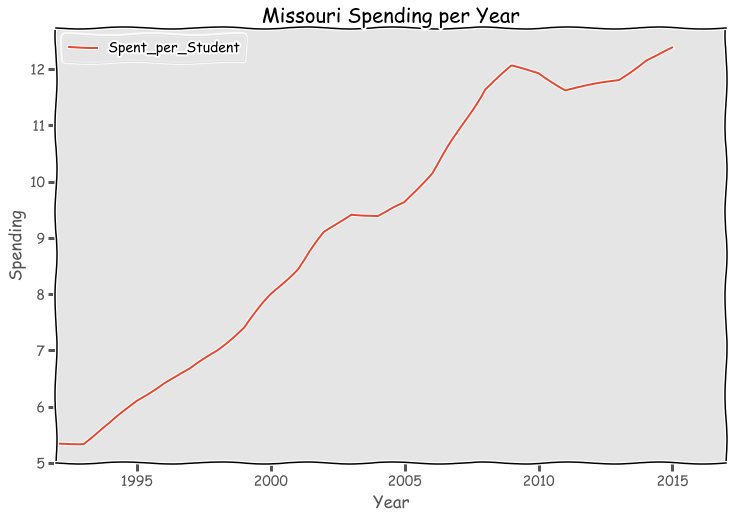

In [40]:
df1.set_index('YEAR').plot(kind = 'line', figsize = (12, 8))
plt.title('Missouri Spending per Year')
plt.xlabel('Year')
plt.ylabel('Spending')
plt.savefig('Missouri.png')
plt.show()

In [42]:
writer = pd.ExcelWriter('missouri_vs_penn.xlsx', engine = 'xlsxwriter')
# first tab
df1.to_excel(writer, sheet_name = 'Missouri', index = False)
workbook = writer.book
worksheet = writer.sheets['Missouri']
worksheet.conditional_format('B2:B27', {'type': '3_color_scale'})
worksheet.insert_image('D2', 'Missouri.png')
# 2nd tab
df2.to_excel(writer, sheet_name = 'Penn', index = False)
worksheet1 = writer.sheets['Penn']
worksheet1.conditional_format('B2:B27', {'type': '3_color_scale'})
workbook.close()

In [43]:
df['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'AMERICAN_SAMOA',
       'BUREAU_OF_INDIAN_AFFAIRS', 'DOD_DOMESTIC', 'DOD_OVERSEAS', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

In [45]:
df['STATE'] = df['STATE'].apply(lambda x: x.title())

In [46]:
df['STATE'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_Of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming', 'American_Samoa',
       'Bureau_Of_Indian_Affairs', 'Dod_Domestic', 'Dod_Overseas', 'Guam',
       'Northern_Marianas', 'Puerto_Rico', 'Virgin_Islands', 'Bi', 'Dd',
       'Northern_Mariana_Islands', 'Department_Of_Defense',
       'Bureau_Of_Indian_Education',
       'Depart

In [51]:
df['STATE'] = df['STATE'].str.replace('_', ' ')

In [52]:
df['STATE'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa',
       'Bureau Of Indian Affairs', 'Dod Domestic', 'Dod Overseas', 'Guam',
       'Northern Marianas', 'Puerto Rico', 'Virgin Islands', 'Bi', 'Dd',
       'Northern Mariana Islands', 'Department Of Defense',
       'Bureau Of Indian Education',
       'Depart

In [53]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
         'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
         'Montana', 'Nebraska', 'Nevada', "New Hampshire", 'New Jersey', 'New Mexico', 'New York',
         'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
         'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin', 'Wyoming', 'District Of Columbia']

In [60]:
writer = pd.ExcelWriter('states.xlsx', engine = 'xlsxwriter')

for state in states:
    df1 = df[df['STATE'] == state][['YEAR','Spent_per_Student']]
    df1.to_excel(writer, sheet_name = state, index = False)
    workbook = writer.book
    worksheet = writer.sheets[state]
    worksheet.conditional_format('B2:B27', {'type': '3_color_scale'})
    df1.set_index('YEAR').plot(kind = 'line', figsize = (12, 8))
    plt.title(f'{state} Spending per Year')
    plt.xlabel('Year')
    plt.ylabel('Spending')
    plt.savefig(f'./plots/{state}.png')
    plt.close()
    worksheet.insert_image('D2', f'./plots/{state}.png')
workbook.close()